<a href="https://colab.research.google.com/github/vishnoiprem/Chargebee-etl/blob/master/CNN_Working_with_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np


In [5]:
io

<module 'skimage.io' from '/usr/local/lib/python3.6/dist-packages/skimage/io/__init__.py'>

In [11]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
!ls "/content/drive/My Drive/"

 1-Document
 20140528
 20140529
 2_Altimetrik
 3_PYPL_DOC
 abcopa_edwin.env.ksh
'Account_Mapping (1).ksh'
 Account_Mapping.ksh
 account_summary_qt.ksh
 acr_afr_qtrly_agg_load.ksh
 AC_REPAIR_BACKBONE_PRC.sql
 acr_repair_aasp_summary_wkly.ksh
 acr_repair_agg_cost_summary_wkly.ksh
 acr_repair_cost_summary_wkly.ksh
 acr_repair_detail_ttf_sur_wkly.ksh
 acr_repair_exception_chk.ksh
 acr_repair_part_cost_wkly.ksh
 acr_repair_parts_summary_mthly.ksh
 acr_repair_type_chk_daily.ksh
 acr_sales_mthly_agg_load.ksh
 acr_semantic_common_functions.ksh
 afo_gifting_detail_load.ksh
 afo_history_data_load.ksh
'Agg_Box_Jobs (1).jil.sql'
 Agg_Box_Jobs.jil.sql
 agg_contact_detail_load.ksh
 agg_csi_additive.ksh
 agg_waro_load.ksh
 amr_account_summary.ksh
 amr_agg_weekly.ksh
 amr_goal_dashboard.ksh
 amr_inv_summary.ksh
 amr_last_update.ksh
 amr_mdm_custgrp.ksh
 amr_product_summary.ksh
 amr_qtrly_trends.ksh
 amr_security_flatten.ksh
 amr_weekly_trends.ksh
 amr_week_relation.ksh
 amr_wkly_trends_dtl.ksh
 aos_fr

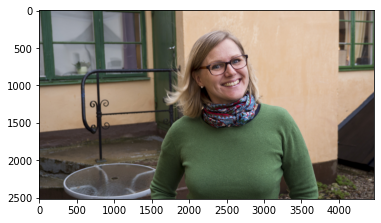

In [25]:
img = io.imread('/content/drive/My Drive/lena.jpg')

plt.imshow(img)
plt.show()

In [26]:
img.shape

(2516, 4473, 3)

In [0]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

In [28]:
red

array([[107, 106, 104, ...,  76,  75,  76],
       [108, 107, 107, ...,  81,  77,  78],
       [103, 104, 106, ...,  83,  80,  86],
       ...,
       [ 37,  36,  37, ...,  74,  73,  74],
       [ 40,  42,  41, ...,  77,  77,  71],
       [ 39,  42,  41, ...,  77,  80,  79]], dtype=uint8)

In [29]:
green

array([[110, 109, 107, ...,  95,  94,  95],
       [111, 110, 110, ..., 100,  96,  97],
       [106, 107, 109, ..., 102,  99, 105],
       ...,
       [ 28,  27,  28, ...,  61,  59,  59],
       [ 31,  33,  32, ...,  64,  62,  56],
       [ 30,  33,  32, ...,  64,  65,  64]], dtype=uint8)

In [30]:
blue

array([[117, 116, 114, ...,  73,  72,  73],
       [118, 117, 117, ...,  78,  74,  75],
       [113, 114, 116, ...,  80,  77,  83],
       ...,
       [ 23,  22,  23, ...,  52,  50,  52],
       [ 26,  28,  27, ...,  56,  55,  49],
       [ 25,  28,  27, ...,  58,  60,  57]], dtype=uint8)

<function matplotlib.pyplot.show>

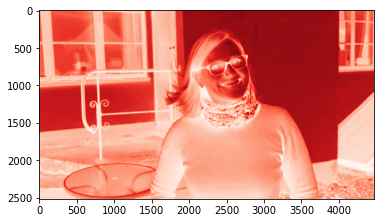

In [31]:
plt.imshow(red, cmap="Reds")
plt.show

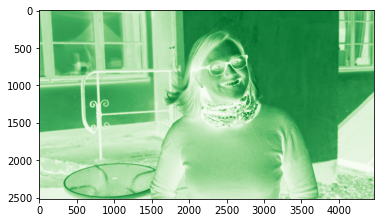

In [32]:
plt.imshow(green, cmap="Greens")
plt.show()

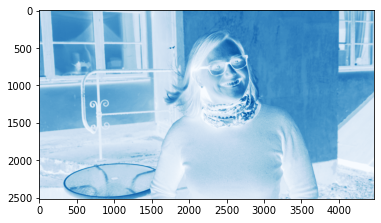

In [33]:
plt.imshow(blue, cmap="Blues")
plt.show()

In [0]:
def filtering(img, f=3):
    
    # Dimensions from the input shape
    (rows, col, channels) = img.shape
    
    # Initialize "hyper parameters"
    stride = 2
    
    # Dimensions of the output
    n_rows = int(1 + (rows - f) / stride)
    n_col = int(1 + (col - f) / stride)
    n_channels = channels
    
    # Initialize output matrix A
    n_img = np.zeros((n_rows, n_col, n_channels))              
    
    # iterate through img
    for h in range(n_rows):                     
        for w in range(n_col):                 
            for c in range (n_channels):            
                vert_start = h*stride
                vert_end = vert_start + f
                horiz_start = w*stride
                horiz_end = horiz_start + f

                # extract slice we are dealing with
                n_slice = img[vert_start:vert_end, horiz_start:horiz_end, c]

                # Compute the filtering operation on the slice
                n_img[h, w, c] = np.mean(n_slice, dtype=int)
    return n_img

ERROR! Session/line number was not unique in database. History logging moved to new session 59


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1257, 2236, 3)


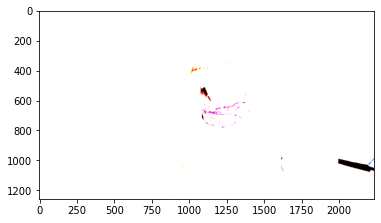

In [35]:
A = filtering(img)
print (A.shape)
plt.imshow(A)
plt.show()

In [0]:
A = filtering(img,f=11)
plt.imshow(A)
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
A = filtering(img,f=25)
print (A.shape)
plt.imshow(A)
plt.show()